# Part I – Linear Regression with One Feature
Stellar Luminosity Modeling

## Context and Objective

In this first part of the assignment, we study a simplified astrophysical regression problem: modeling the luminosity of a star as a function of its mass. This problem is inspired by the behavior of main-sequence stars, where luminosity increases as stellar mass grows


What This Part Covers

In Part I, we assume that luminosity depends only on one feature: stellar mass. The model is defined as a linear function with a bias term:

The predictive model used in this notebook is a linear hypothesis with an explicit bias term:

$$
\hat{L} = wM + b
$$

where:
- \( w \) represents the slope of the relationship between mass and luminosity,
- \( b \) represents a bias or baseline luminosity offset.

To evaluate how well the model fits the data, the **mean squared error (MSE)** loss function is defined as:

$$
J(w,b) = \frac{1}{m} \sum_{i=1}^{m} \left( \hat{L}_i - L_i \right)^2
$$

where \( m \) is the number of observed stars, \( L_i \) are the true luminosities, and \( \hat{L}_i \) are the predicted values.

Model training is performed using **gradient descent**, which iteratively updates the parameters by moving in the direction of the negative gradient of the loss function:

$$
w := w - \alpha \frac{\partial J}{\partial w}, \quad
b := b - \alpha \frac{\partial J}{\partial b}
$$

This notebook explores the geometry of the cost function \( J(w,b) \), analyzes convergence behavior under different learning rates, and evaluates the limitations of a linear model when applied to stellar physics.

By explicitly defining the hypothesis, loss function, and optimization algorithm, this notebook demonstrates how a complete regression system is constructed and analyzed without relying on high-level machine learning libraries

## 1. Setup

In [ ]:

# Install required libraries (example notebook 01)
%pip install numpy pandas matplotlib

import numpy as np
import matplotlib.pyplot as plt

## Statement notation throughout the document


- M: stellar mass (in units of solar mass, M⊙)
- T: effective stellar temperature (Kelvin, K)
- L: stellar luminosity (in units of solar luminosity, L⊙)


Part I dataset (one feature)

In [ ]:

M = np.array([0.6,0.8,1.0,1.2,1.4,1.6,1.8,2.0,2.2,2.4])
L = np.array([0.15,0.35,1.00,2.30,4.10,7.00,11.2,17.5,25.0,35.0])
n = len(M)

### Visualize the Data

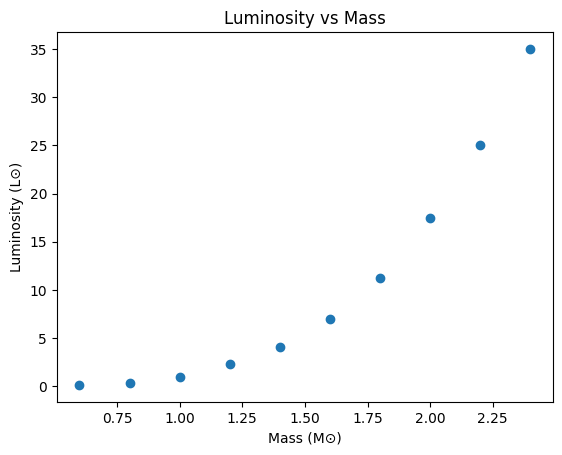

In [ ]:
#Creating the graph with the given data

plt.scatter(M, L)
plt.xlabel("Mass  (M⊙)")
plt.ylabel("Luminosity (L⊙)")
plt.title("Luminosity vs Mass")
plt.show()

The relationship is clearly nonlinear; luminosity grows faster than mass

- The predict function computes the output of a simple linear regression model by applying a weight and a bias to the input data, it is used to generate predicted values based on the model parameters. 

- The mse function calculates the Mean Squared Error between the predicted values and the actual values, which allows evaluating how well the model fits the data by measuring the average squared prediction error.

### Linear Regression Model

In [14]:
#Simple linear regression
def predict(M, w, b):
    return w*M + b

#Mean Squared Error)
def mse(y, yhat): 
    return np.mean((y - yhat)**2)

### Visualize the Data

It evaluates a grid of possible w(weight) and b(bias), computes the Mean Squared Error for each pair, and stores the results in the matrix J, the contour plot represents lines of equal cost, allowing us to visually identify the region where the error is minimized, the lowest point on this surface corresponds to the optimal parameters that best fit the dat

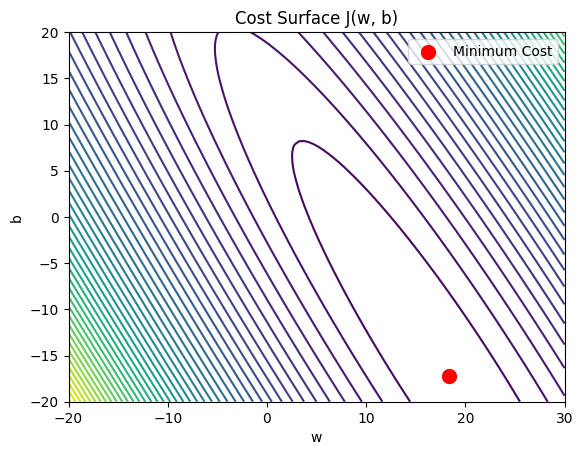

In [33]:
w_vals = np.linspace(-20, 30, 100)
b_vals = np.linspace(-20, 20, 100)

W, B = np.meshgrid(w_vals, b_vals)
J = np.zeros(W.shape)

for i in range(W.shape[0]):
    for j in range(W.shape[1]):
        yhat = predict(M, W[i, j], B[i, j])
        J[i, j] = mse(L, yhat)

min_idx = np.unravel_index(np.argmin(J), J.shape)
w_min = W[min_idx]
b_min = B[min_idx]

plt.contour(W, B, J, levels=50)
plt.scatter(w_min, b_min, color="red", s=100, label="Minimum Cost")
plt.xlabel("w")
plt.ylabel("b")
plt.title("Cost Surface J(w, b)")
plt.legend()
plt.show()


The contour plot represents the cost surface of the linear regression model. The red point marks the global minimum, corresponding to the optimal values of w and b that minimize the mean squared errorr.

### Implementation of Gradient Descent for Linear Regression

At each iteration, it computes the model predictions, calculates the error with respect to the true values, and derives the gradients of the Mean Squared Error loss with respect to the weight and bias, the parameters are then updated using the learning rate to move in the direction that minimizes the loss, the function also stores the loss value at each iteration, allowing analysis of convergence behavior over time


Gradient Descent (NON-VECTORIZED)

In [38]:
def grad_desc_non_vectorized(M, L, w, b, alpha, iters):
    losses = []
    n = len(M)

    for _ in range(iters):
        dw = 0
        db = 0

        # Explicit loop over samples (NON-VECTORIZED)
        for i in range(n):
            yhat_i = w * M[i] + b
            error_i = yhat_i - L[i]
            dw += error_i * M[i]
            db += error_i

        dw = 2 * dw / n
        db = 2 * db / n

        w -= alpha * dw
        b -= alpha * db

        losses.append(mse(L, predict(M, w, b)))

    return w, b, losses


This vectorized implementation performs the same optimization as the non-vectorized version but is computationally more efficient due to NumPy array operation

In [37]:
def grad_desc(M, L, w, b, alpha, iters):
    losses = []

    for _ in range(iters):
        yhat = predict(M, w, b)
        error = yhat - L

        dw = 2 * np.mean(error * M)
        db = 2 * np.mean(error)

        w -= alpha * dw
        b -= alpha * db

        losses.append(mse(L, yhat))

    return w, b, losses

In [39]:

rates=[0.001,0.01,0.05]
for r in rates:
    w,b,losses = grad_desc(M,L,0,0,r,1000)
    print(r,w,b,losses[-1])

0.001 7.956342902098342 0.009456148830540434 56.271275669411736
0.01 16.283907559235097 -13.776202412299618 20.803819062183177
0.05 18.129395435290267 -16.833950771196893 19.59029726741101


### Convergence Analysis

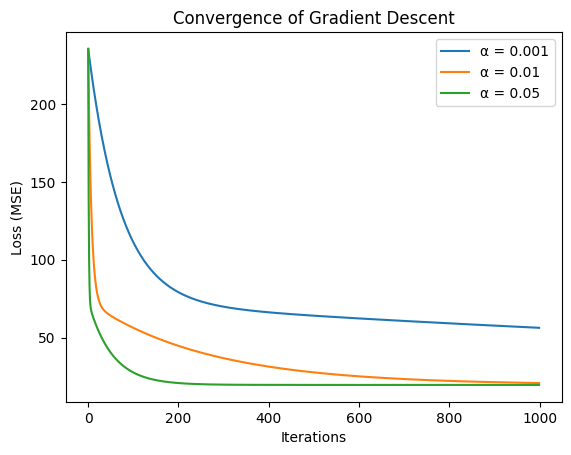

In [40]:
rates = [0.001, 0.01, 0.05]

for r in rates:
    w, b, losses = grad_desc(M, L, 0, 0, r, 1000)
    plt.plot(losses, label=f"α = {r}")

plt.xlabel("Iterations")
plt.ylabel("Loss (MSE)")
plt.title("Convergence of Gradient Descent")
plt.legend()
plt.show()

Smaller learning rates converge slowly but stably, while larger learning rates converge faster but may risk instability

### Visualize the Data

In [42]:
for r in rates:
    w, b, losses = grad_desc(M, L, 0, 0, r, 1000)
    print(f"α={r} → w={w:.3f}, b={b:.3f}, final loss={losses[-1]:.4f}")

α=0.001 → w=7.956, b=0.009, final loss=56.2713
α=0.01 → w=16.284, b=-13.776, final loss=20.8038
α=0.05 → w=18.129, b=-16.834, final loss=19.5903


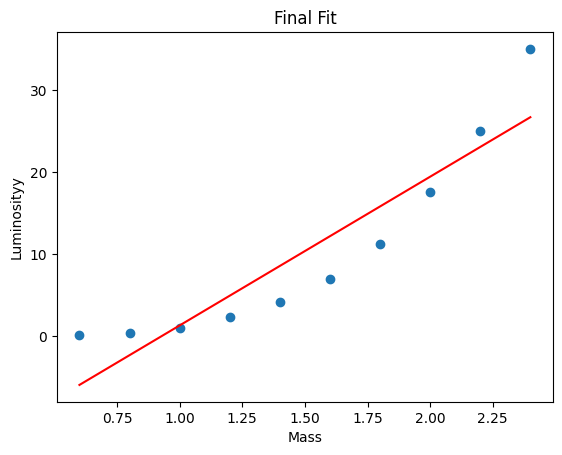

In [19]:

plt.scatter(M,L)
plt.plot(M,predict(M,w,b),color="red")
plt.xlabel("Mass")
plt.ylabel("Luminosityy")
plt.title("Final Fit")
plt.show()


w represents sensitivity of luminosity to mass. Linear model is limited because stellar physics is nonlinear.

### Conceptual questions

1. astrophysical meaning of w

    The parameter w represents how much the stellar luminosity changes when the stellar mass increases. In this linear model, it shows the average increase in luminosity per unit of mass. Physically, this reflects the idea that more massive stars tend to be more luminous because they produce more energy in their core, although simplified, w captures this general trend within the range of data used

2. Why is a linear model limited here?

    A linear model is limited because the relationship between stellar mass and luminosity is not linear in reality, in stars, luminosity increases much faster than mass, especially for higher-mass stars.  A linear model cannot represent this curved behavior, so it may produce inaccurate predictions, for this reason, more complex models with nonlinear terms are needed to better describe the physical relationship